In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
ada = pd.read_csv("ADA-USD.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
#inspecting the data
ada.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [4]:
#summary of data
ada.info

<bound method DataFrame.info of                 Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2017-10-01  0.021678  0.032226  0.017354  0.024969   0.024969  5.006870e+07
2017-10-02  0.024607  0.030088  0.019969  0.025932   0.025932  5.764130e+07
2017-10-03  0.025757  0.027425  0.020690  0.020816   0.020816  1.699780e+07
2017-10-04  0.020864  0.022806  0.020864  0.021931   0.021931  9.000050e+06
2017-10-05  0.021951  0.022154  0.020859  0.021489   0.021489  5.562510e+06
...              ...       ...       ...       ...        ...           ...
2021-08-31  2.737641  2.877878  2.706473  2.772475   2.772475  5.085984e+09
2021-09-01  2.769947  2.902614  2.726327  2.870767   2.870767  4.652639e+09
2021-09-02  2.869750  3.099186  2.839781  2.963438   2.963438  7.376032e+09
2021-09-03  2.959315  3.029436  2.907606  2.968239   2.968239  5.244577e+09
2021-09-04  2.960665  2.966121  2.921135  2.930362   2.9

In [5]:
#summary statistics
ada.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1.431000e+03
mean,0.319708,0.337130,0.302364,0.321734,0.321734,1.005328e+09
std,0.520927,0.549858,0.494055,0.525482,0.525482,2.199785e+09
min,0.018414,0.021050,0.017354,0.018539,0.018539,1.739460e+06
25%,0.046842,0.048389,0.045401,0.046886,0.046886,5.169782e+07
50%,0.090832,0.094088,0.087401,0.090867,0.090867,1.276780e+08
75%,0.242979,0.258416,0.229075,0.244634,0.244634,6.083750e+08
max,2.960665,3.099186,2.921135,2.968239,2.968239,1.914198e+10


In [8]:
#ada open price of 1 year from Oct 2017 to Oct 2018
adaOpenOneYear = ada.loc["2017-10-01":"2018-10-01", "Open"]
adaOpenOneYear

Date
2017-10-01    0.021678
2017-10-02    0.024607
2017-10-03    0.025757
2017-10-04    0.020864
2017-10-05    0.021951
                ...   
2018-09-27    0.079466
2018-09-28    0.086403
2018-09-29    0.083712
2018-09-30    0.084368
2018-10-01    0.085292
Name: Open, Length: 366, dtype: float64

In [9]:
adaOpenOneYear.describe()

count    366.000000
mean       0.226521
std        0.205854
min        0.018414
25%        0.094951
50%        0.162023
75%        0.296669
max        1.171150
Name: Open, dtype: float64

## Simple Visualizations

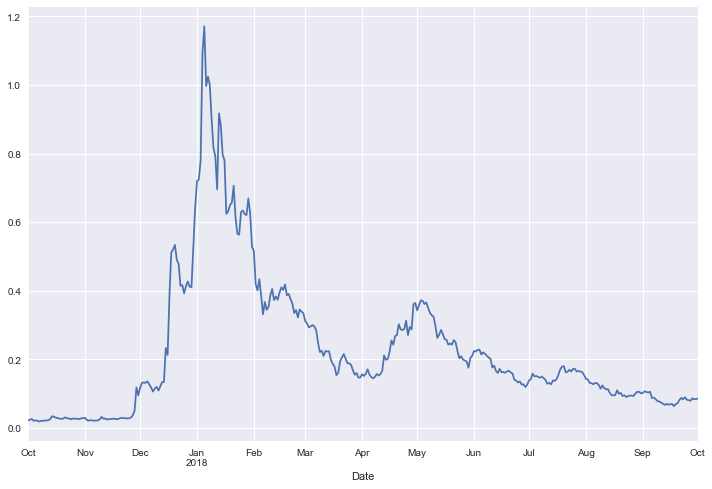

In [12]:
#plotting the price of One Year
adaOpenOneYear.plot(figsize = (12,8))
plt.show()

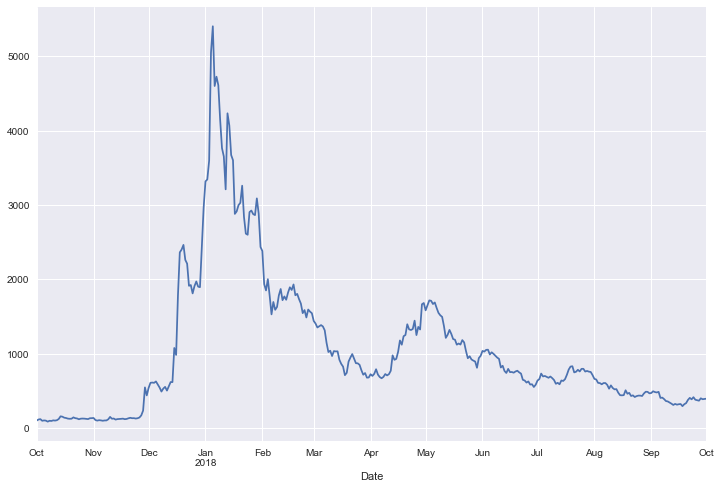

In [14]:
adaOpenOneYear.div(adaOpenOneYear.iloc[0]).mul(100).plot(figsize = (12,8))
plt.show()

In [17]:
#Monthly data
adaYearly = ada.resample("Y").last()
adaMonthly = ada.resample("M").last()
adaDaily = ada.resample("D").last()

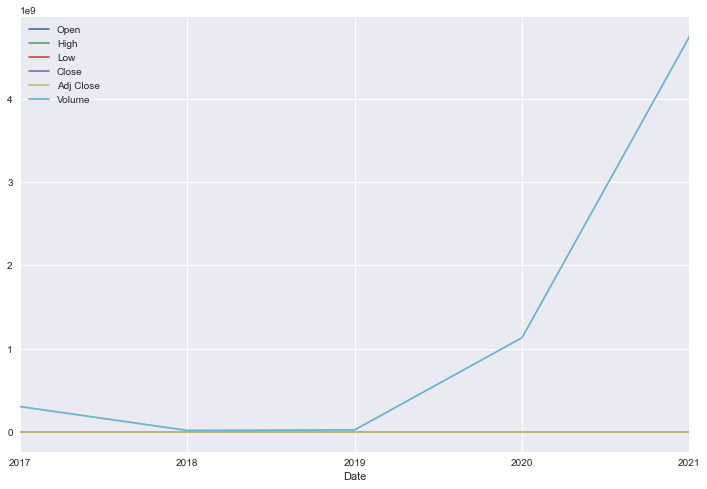

In [18]:
adaYearly.plot(figsize = (12,8))
plt.show()

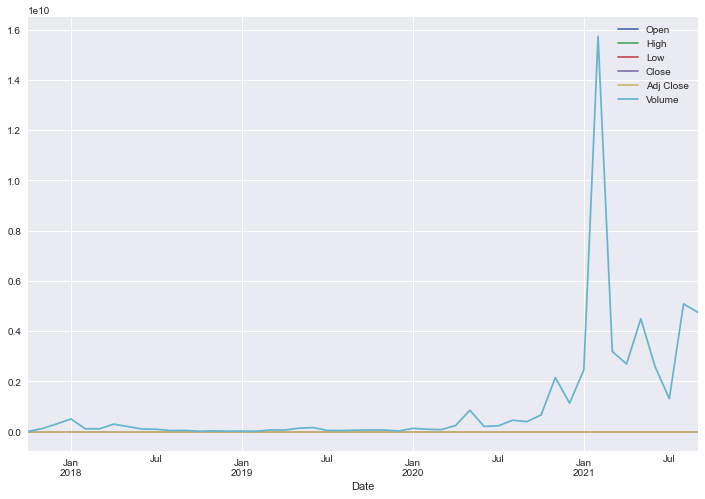

In [16]:
adaMonthly.plot(figsize = (12,8))
plt.show()

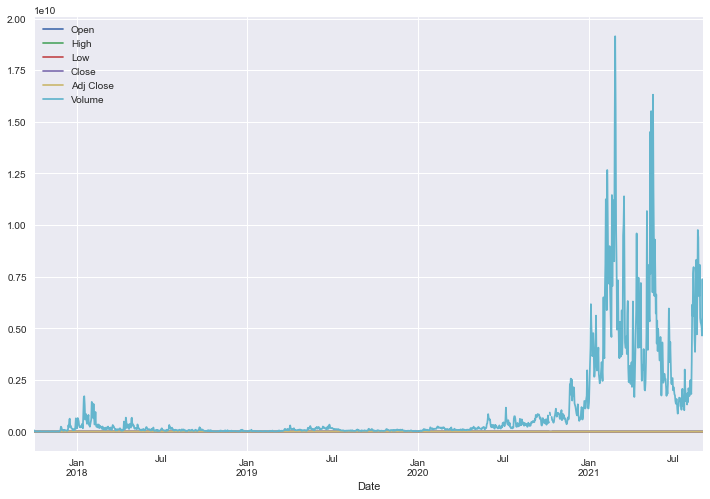

In [19]:
adaDaily.plot(figsize = (12,8))
plt.show()

## Returns and Summary Visualizations

Calculating returns via percent change.

In [20]:
ret = adaDaily.pct_change().dropna()
ret

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-02,0.135114,-0.066344,0.150686,0.038568,0.038568,0.151244
2017-10-03,0.046735,-0.088507,0.036106,-0.197285,-0.197285,-0.705111
2017-10-04,-0.189968,-0.168423,0.008410,0.053565,0.053565,-0.470517
2017-10-05,0.052099,-0.028589,-0.000240,-0.020154,-0.020154,-0.381947
2017-10-06,-0.026969,-0.027625,-0.119804,-0.137280,-0.137280,0.398777
...,...,...,...,...,...,...
2021-08-31,-0.039674,-0.002552,-0.006550,0.014384,0.014384,-0.025889
2021-09-01,0.011801,0.008595,0.007336,0.035453,0.035453,-0.085204
2021-09-02,0.036031,0.067722,0.041614,0.032281,0.032281,0.585344


Calculate __mean__ and  __standard deviation__ of monthly returns

In [22]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
Open,0.006259,0.081173
High,0.005575,0.076678
Low,0.006333,0.075578
Close,0.006220,0.082556
Adj Close,0.006220,0.082556
Volume,0.087315,0.507421


Annualize mean and standard deviation of returns

In [24]:
summary["mean"] = summary["mean"]*12
summary["std"] = summary["std"]*np.sqrt(12)
summary

,mean,std
Open,0.901329,0.974072
High,0.802736,0.920137
Low,0.911945,0.906930
Close,0.895716,0.990670
Adj Close,0.895716,0.990670
Volume,12.573315,6.089048


Plot and compare the performance of Ada

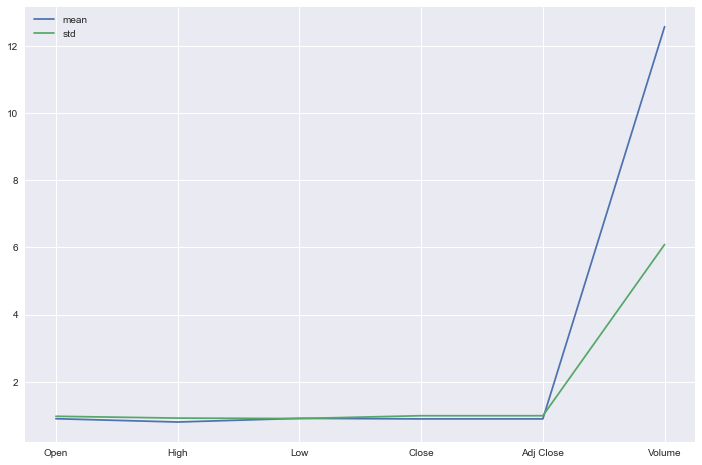

In [26]:
adaDaily.plot(figsize = (12,8))
plt.show()

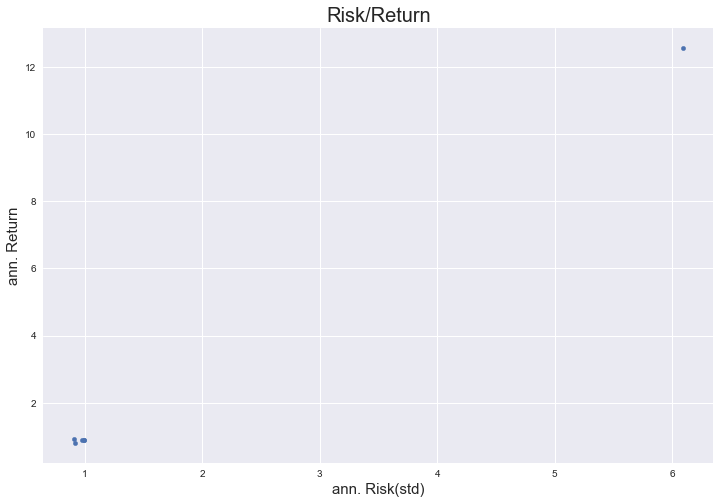

In [32]:
summary.plot(kind = "scatter",x = "std", y = "mean", figsize = (12,8))
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [53]:
ret.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.414499,0.624491,0.018753,0.018753,0.024523
High,0.414499,1.000000,0.475944,0.753289,0.753289,0.522153
Low,0.624491,0.475944,1.000000,0.450461,0.450461,-0.062604
Close,0.018753,0.753289,0.450461,1.000000,1.000000,0.369244
Adj Close,0.018753,0.753289,0.450461,1.000000,1.000000,0.369244
Volume,0.024523,0.522153,-0.062604,0.369244,0.369244,1.000000


In [55]:
import seaborn as sns

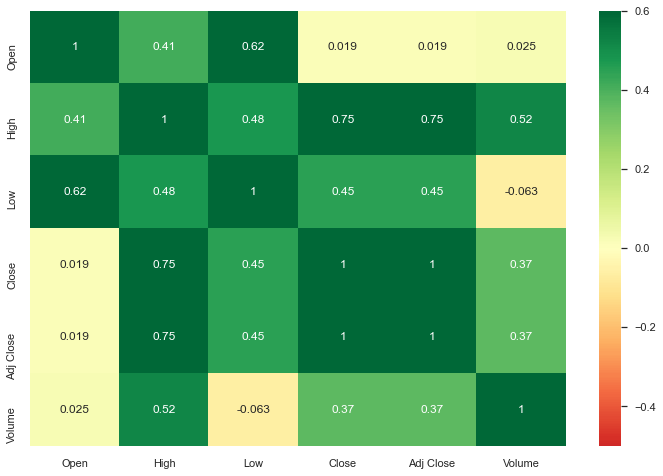

In [56]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.heatmap(ret.corr(), cmap = "RdYlGn", annot = True, vmin = -0.5, vmax = 0.6, center = 0)
plt.show()

## More Visualizations

In [35]:
ada

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,5.006870e+07
2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,5.764130e+07
2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,1.699780e+07
2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9.000050e+06
2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5.562510e+06
...,...,...,...,...,...,...
2021-08-31,2.737641,2.877878,2.706473,2.772475,2.772475,5.085984e+09
2021-09-01,2.769947,2.902614,2.726327,2.870767,2.870767,4.652639e+09
2021-09-02,2.869750,3.099186,2.839781,2.963438,2.963438,7.376032e+09


In [40]:
Open = ada["Open"]
Open

Date
2017-10-01    0.021678
2017-10-02    0.024607
2017-10-03    0.025757
2017-10-04    0.020864
2017-10-05    0.021951
                ...   
2021-08-31    2.737641
2021-09-01    2.769947
2021-09-02    2.869750
2021-09-03    2.959315
2021-09-04    2.960665
Name: Open, Length: 1435, dtype: float64

In [41]:
x = Open.to_numpy()
x

array([0.021678, 0.024607, 0.025757, ..., 2.86975 , 2.959315, 2.960665])

In [42]:
Close = ada["Close"]
Close

Date
2017-10-01    0.024969
2017-10-02    0.025932
2017-10-03    0.020816
2017-10-04    0.021931
2017-10-05    0.021489
                ...   
2021-08-31    2.772475
2021-09-01    2.870767
2021-09-02    2.963438
2021-09-03    2.968239
2021-09-04    2.930362
Name: Close, Length: 1435, dtype: float64

In [43]:
y = Close.to_numpy()
y

array([0.024969, 0.025932, 0.020816, ..., 2.963438, 2.968239, 2.930362])

Scatterplots

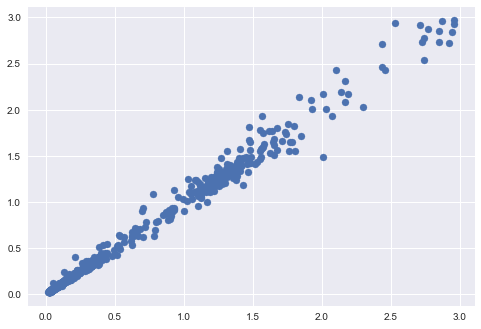

In [46]:
plt.scatter(x,y)
plt.show()

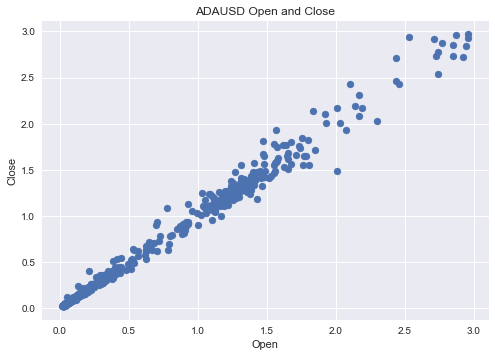

In [47]:
plt.scatter(x,y)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('ADAUSD Open and Close')
plt.show()

Histograms

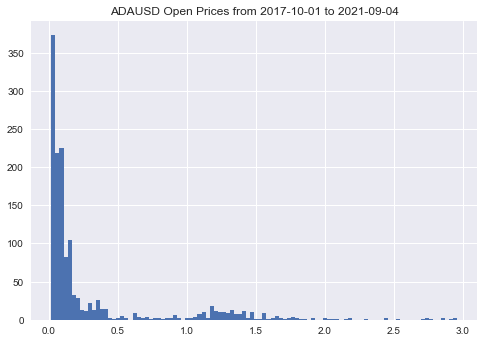

In [52]:
plt.hist(x, bins = 100)
plt.title('ADAUSD Open Prices from 2017-10-01 to 2021-09-04')
plt.show();